## True Car -  Exploratory Data Analysis + Feature Engineering

### Technocolabs Internship Project April 2022

**Task Details : To Perform Feature Engineering**

**By Mukul Dev Mahato**

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1. Loading  Datasets

In [2]:
df1 = pd.read_csv("tc20171021.csv", error_bad_lines=False, warn_bad_lines=False)
df2 = pd.read_csv("true_car_listings.csv")

In [3]:
df1.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [4]:
df2.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


### 2, Understanding the data

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216250 entries, 0 to 1216249
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Id       1216250 non-null  int64 
 1   Price    1216250 non-null  int64 
 2   Year     1216250 non-null  int64 
 3   Mileage  1216250 non-null  int64 
 4   City     1216250 non-null  object
 5   State    1216250 non-null  object
 6   Vin      1216250 non-null  object
 7   Make     1216250 non-null  object
 8   Model    1216250 non-null  object
dtypes: int64(4), object(5)
memory usage: 83.5+ MB


In [6]:
df1.describe()

,Id,Price,Year,Mileage
count,1.216250e+06,1.216250e+06,1.216250e+06,1.216250e+06
mean,6.132814e+05,2.096887e+04,2.013307e+03,5.290810e+04
std,3.546571e+05,1.315940e+04,3.441842e+00,8.192775e+04
min,1.000000e+00,1.500000e+03,1.997000e+03,5.000000e+00
25%,3.081122e+05,1.299400e+04,2.012000e+03,2.396200e+04
50%,6.134915e+05,1.799500e+04,2.014000e+03,4.053400e+04
75%,9.175538e+05,2.641400e+04,2.016000e+03,7.272500e+04
max,1.233042e+06,4.995000e+05,2.018000e+03,7.758776e+07


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [8]:
df2.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


### 3. Data Preprocessing

In [9]:
df1.shape

(1216250, 9)

In [10]:
df2.shape

(852122, 8)

### 3.1 Removing ID Column from the dataset

In [11]:
df1.drop('Id',axis = 1, inplace = True)

In [12]:
df1.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


### 3.2 Merging the two datasets

In [13]:
df = pd.concat([df1, df2], axis = 'index', join='inner', ignore_index=True)

In [14]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
2068367,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
2068368,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
2068369,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
2068370,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


### 3.3 Column's Types

In [15]:
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

### 3.4 Missing Data

In [16]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64


### 3.5 Statistical Analysis:


In [17]:
df.columns.tolist()

['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model']

In [18]:
df.describe()

,Price,Year,Mileage
count,2.068372e+06,2.068372e+06,2.068372e+06
mean,2.117289e+04,2.013300e+03,5.274318e+04
std,1.334331e+04,3.430814e+00,6.836142e+04
min,1.500000e+03,1.997000e+03,5.000000e+00
25%,1.299500e+04,2.012000e+03,2.391000e+04
50%,1.800000e+04,2.014000e+03,4.042300e+04
75%,2.681700e+04,2.016000e+03,7.250400e+04
max,4.995000e+05,2.018000e+03,7.758776e+07


In [19]:
df.max()

Price                 499500
Year                    2018
Mileage             77587763
City             victorville
State                     ga
Vin        ZN661YUS9HX226976
Make                   smart
Model               xDManual
dtype: object

In [20]:
df.iloc[[df['Price'].argmax()]]

,Price,Year,Mileage,City,State,Vin,Make,Model
991641,499500,2014,3260,Westville,NJ,WDDRJ7HA4EA010693,Mercedes-Benz,SLS


In [21]:
df['Make'].value_counts()

Ford             272431
Chevrolet        252694
Toyota           192881
Nissan           164960
Honda            127073
Jeep             100696
Hyundai           90484
Dodge             85056
GMC               72053
Kia               71470
BMW               64830
Mercedes-Benz     64454
Volkswagen        56487
Lexus             50471
Chrysler          40205
Subaru            40186
Cadillac          36958
Ram               35053
Mazda             33222
Buick             30648
INFINITI          30010
Audi              25236
Acura             22098
Lincoln           17189
Volvo             12443
MINI              10599
Mitsubishi        10013
Land               9940
Porsche            9891
Scion              7432
Jaguar             5314
FIAT               4395
Pontiac            4365
Mercury            2670
Maserati           2426
Saturn             2407
HUMMER             2282
smart              1695
Suzuki              818
Ferrari             765
Bentley             734
Saab            

In [22]:
df['Year'].value_counts()

2015    381936
2014    380507
2016    321236
2017    233846
2013    178913
2012    122444
2011     97066
2010     67919
2008     60198
2007     51518
2009     46551
2006     36591
2005     26808
2004     19996
2003     13722
2002      9225
2001      6347
2000      4693
1999      3051
2018      2539
1998      1844
1997      1422
Name: Year, dtype: int64

### 3.5.1 Descriptive Analysis

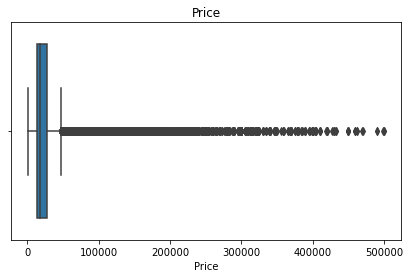

In [23]:
plt.figure(figsize=(7,4))

plt.title('Price')
sns.boxplot(x=df.Price)

plt.show()

**Here we can see that there is a huge number of outliers present in the Price column of the dataset.**

**Ploting Outliers present in Year column.**

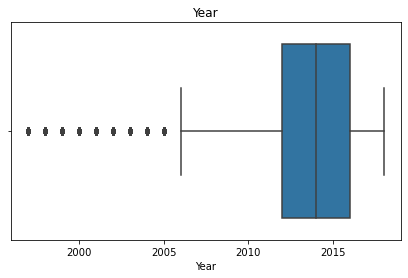

In [24]:
plt.figure(figsize=(7,4))

plt.title('Year')
sns.boxplot(df.Year)

plt.show()

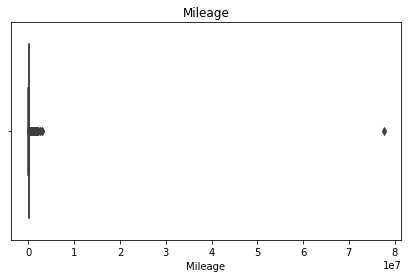

In [25]:
plt.figure(figsize=(7,4))

plt.title('Mileage')
sns.boxplot(df.Mileage)

plt.show()

**Outliers present in Mileage Column**

### 3.5.1.1 Numerical Features Analysis

In [26]:
# Handling the Outliers for Price 

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1



#Lower and Upper
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outlier_low = df['Price'] < lower_lim
outlier_high = df['Price'] > upper_lim

In [27]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
2068367,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
2068368,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
2068369,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
2068370,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [28]:
df = df[~ (outlier_low | outlier_high)]

In [29]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
2068326,37999,2016,10801,Portsmouth,NH,YV1902SP8G1300493,Volvo,V60T6
2068339,44565,2016,5650,Miami,FL,YV126MFK0G2407090,Volvo,S60T5
2068358,45280,2017,8,San Leandro,CA,YV140MEK1H1370375,Volvo,V60T5
2068361,46500,2017,8,San Leandro,CA,YV140MEM3H1370217,Volvo,V60T5


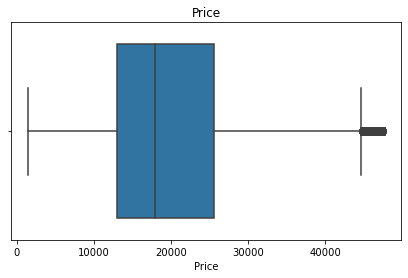

In [30]:
#Outliers Removed from Price


plt.figure(figsize=(7,4))

plt.title('Price')
sns.boxplot(x=df.Price)

plt.show()

**Outliers removed from Price column.**

In [31]:
# Handling the Outliers for Mileage

Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1



#Lower and Upper
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outlier_low = df['Mileage'] < lower_lim
outlier_high = df['Mileage'] > upper_lim

In [32]:
df = df[~ (outlier_low | outlier_high)]

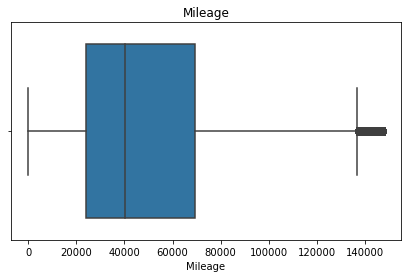

In [33]:
#Outliers Removed from Mileage


plt.figure(figsize=(7,4))

plt.title('Mileage')
sns.boxplot(df.Mileage)

plt.show()

**Outliers removed from Mileage Column.**

Text(0.5, 1.0, 'Price and Mileage Relationship')

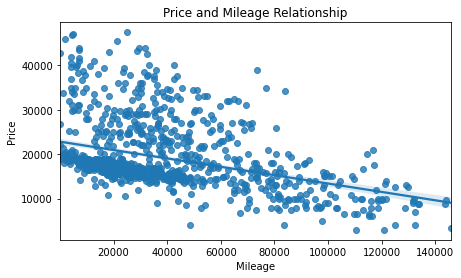

In [34]:
# Price and mileage relationship
plt.figure(figsize=[7,4])

sns.regplot(x=df['Mileage'][:1000], y=df['Price'][:1000]).set_title("Price and Mileage Relationship")


We can see there is a **negative** relationship between Price and Mileage columns indicating that the Price of certain car decreases as mileage increases.

Text(0.5, 1.0, 'Price and Year Relationship')

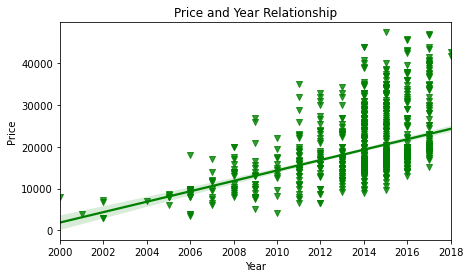

In [35]:
# Price and year relationship
plt.figure(figsize=[7,4])

sns.regplot(x=df['Year'][:1000], y=df['Price'][:1000], color = 'green', marker = 'v').set_title("Price and Year Relationship")

From above graph it is clearly indicated that the price for car of 2015 is way more than that of the one from 2000. 

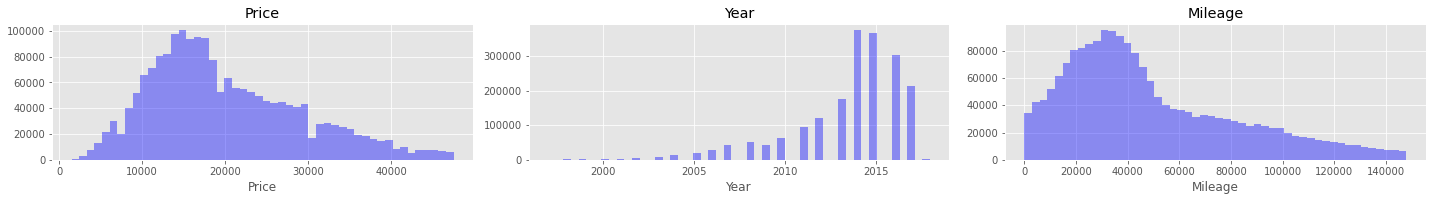

In [36]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(df[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

**Observations**
1. There are more number of cars available in the price range of 10K to 20K.
2. More number of cars are of Year 2015.
3. More number of cars have a mileage driven around 40K.

### 3.5.1.2 Categorical Features Analysis

In [37]:
# List of Categorical Columns

categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns

Index(['City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [38]:

for col in categorical_columns:
    print(df[col].unique())
    print("-----------------------------------------------------------")

['Jefferson City' 'Highland' 'Boone' ... 'Northfield' 'Huntington Valley'
 'Winslow']
-----------------------------------------------------------
[' MO' ' IN' ' NC' ' LA' ' NV' ' NY' ' CA' ' AR' ' FL' ' AZ' ' KY' ' TN'
 ' MI' ' TX' ' PA' ' OK' ' NJ' ' MD' ' OH' ' GA' ' Va' ' Fl' ' CO' ' ND'
 ' AL' ' IL' ' MA' ' WA' ' WI' ' MN' ' VA' ' KS' ' RI' ' OR' ' MS' ' NM'
 ' SC' ' NE' ' IA' ' NH' ' UT' ' ME' ' CT' ' HI' ' ID' ' DE' ' MT' ' WV'
 ' WY' ' SD' ' AK' ' VT' ' Ga' ' ga' ' Md' ' Ca' ' Oh' ' Az' ' DC']
-----------------------------------------------------------
['KL4CJBSBXFB267643' 'KL4CJASB5FB245057' 'KL4CJCSB0FB264921' ...
 'WVWHV7AJ4DW123050' 'WVGGF7BP7HD001131' 'WVGGF7BP9HD001129']
-----------------------------------------------------------
['Buick' 'Acura' 'Audi' 'BMW' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'FIAT' 'Ford' 'GMC' 'Honda' 'Genesis' 'Geo' 'Freightliner' 'Fisker'
 'Bentley' 'Alfa' 'AM' 'Aston' 'Jeep' 'Kia' 'Land' 'Lexus' 'Lincoln'
 'Lotus' 'Maserati' 'Mazda' 'Mercedes

### 3.5.1.2.1 Removing Duplicate Vins

In [39]:
# duplicate rows on basis of Vin

duplicate = df[df.duplicated('Vin')]
 
print("Duplicate Rows based on Vins :")
print("--------------------------------")
print(duplicate)

Duplicate Rows based on Vins :
--------------------------------
         Price  Year  Mileage              City State                Vin  \
1216250   8995  2014    35725           El Paso    TX  19VDE2E53EE000083   
1216251  10888  2013    19606  Long Island City    NY  19VDE1F52DE012636   
1216252   8995  2013    48851           El Paso    TX  19VDE2E52DE000025   
1216253  10999  2014    39922           Windsor    CO  19VDE1F71EE003817   
1216254  14799  2016    22142            Lindon    UT  19UDE2F32GA001284   
...        ...   ...      ...               ...   ...                ...   
2068326  37999  2016    10801        Portsmouth    NH  YV1902SP8G1300493   
2068339  44565  2016     5650             Miami    FL  YV126MFK0G2407090   
2068358  45280  2017        8       San Leandro    CA  YV140MEK1H1370375   
2068361  46500  2017        8       San Leandro    CA  YV140MEM3H1370217   
2068362  46530  2017       10       San Leandro    CA  YV140MEK7H1364709   

          Make         

In [40]:
df.drop_duplicates(subset = ['Vin'], keep='first', inplace = True)

In [41]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
2059279,17909,2013,36275,Charlotte,NC,WVWHV7AJ0DW009210,Volkswagen,"GTI4-Door,"
2062500,18995,2013,43079,Mission,TX,WVWHV7AJ5DW082797,Volkswagen,"GTI4-Door,"
2062580,16551,2013,68107,Austin,TX,WVWHV7AJ4DW123050,Volkswagen,"GTI4-Door,"
2062970,43950,2017,13569,Hayward,CA,WVGGF7BP7HD001131,Volkswagen,TouaregV6


### 3.5.1.2.2 Handling States' names

In [42]:
df.State.unique()

array([' MO', ' IN', ' NC', ' LA', ' NV', ' NY', ' CA', ' AR', ' FL',
       ' AZ', ' KY', ' TN', ' MI', ' TX', ' PA', ' OK', ' NJ', ' MD',
       ' OH', ' GA', ' Va', ' Fl', ' CO', ' ND', ' AL', ' IL', ' MA',
       ' WA', ' WI', ' MN', ' VA', ' KS', ' RI', ' OR', ' MS', ' NM',
       ' SC', ' NE', ' IA', ' NH', ' UT', ' ME', ' CT', ' HI', ' ID',
       ' DE', ' MT', ' WV', ' WY', ' SD', ' AK', ' VT', ' Ga', ' ga',
       ' Md', ' Ca', ' Oh', ' Az', ' DC'], dtype=object)

In [43]:
# Replacing some state name
df.State.value_counts()

 TX    129788
 CA    108807
 FL    100994
 GA     51782
 IL     51305
 NC     49162
 VA     45800
 PA     38202
 NY     36568
 NJ     35932
 OH     31975
 AZ     31164
 WA     30260
 CO     29750
 MA     25482
 TN     25380
 MD     24346
 MO     22126
 IN     21827
 KY     18874
 AL     17226
 WI     15478
 MN     14713
 CT     14441
 MI     14269
 OK     13889
 UT     13819
 OR     13653
 SC     13304
 LA     10770
 KS     10368
 NV      9940
 AR      9006
 NH      7895
 MS      7850
 NM      6676
 NE      6471
 IA      6253
 ID      4482
 DE      3590
 HI      3542
 ME      2520
 RI      2499
 MT      2364
 AK      2173
 WV      1941
 ND      1662
 VT      1488
 SD      1411
 Fl      1025
 WY       881
 Va       385
 Md       237
 Ga       187
 ga       177
 Az        91
 Oh        86
 Ca        43
 DC        26
Name: State, dtype: int64

In [44]:
#Replacing the state names 

df['State'] = df['State'].replace([' Ca'],' CA')
df['State'] = df['State'].replace([' Ga',' ga'],' GA')
df['State'] = df['State'].replace([' Md'],' MD')
df['State'] = df['State'].replace([' Oh'],' OH')
df['State'] = df['State'].replace([' Az'],' AZ')
df['State'] = df['State'].replace([' Va'],' VA')
df['State'] = df['State'].replace([' Fl'],' FL')

In [45]:
df.State.unique()

array([' MO', ' IN', ' NC', ' LA', ' NV', ' NY', ' CA', ' AR', ' FL',
       ' AZ', ' KY', ' TN', ' MI', ' TX', ' PA', ' OK', ' NJ', ' MD',
       ' OH', ' GA', ' VA', ' CO', ' ND', ' AL', ' IL', ' MA', ' WA',
       ' WI', ' MN', ' KS', ' RI', ' OR', ' MS', ' NM', ' SC', ' NE',
       ' IA', ' NH', ' UT', ' ME', ' CT', ' HI', ' ID', ' DE', ' MT',
       ' WV', ' WY', ' SD', ' AK', ' VT', ' DC'], dtype=object)

On inspecting we can see that there is a trailing space infront of every state names which was creating a problem
So the next step is to remove the space infront of every states names.

In [46]:
df['State'] = df['State'].str.strip()

In [47]:
df['State'].unique()

array(['MO', 'IN', 'NC', 'LA', 'NV', 'NY', 'CA', 'AR', 'FL', 'AZ', 'KY',
       'TN', 'MI', 'TX', 'PA', 'OK', 'NJ', 'MD', 'OH', 'GA', 'VA', 'CO',
       'ND', 'AL', 'IL', 'MA', 'WA', 'WI', 'MN', 'KS', 'RI', 'OR', 'MS',
       'NM', 'SC', 'NE', 'IA', 'NH', 'UT', 'ME', 'CT', 'HI', 'ID', 'DE',
       'MT', 'WV', 'WY', 'SD', 'AK', 'VT', 'DC'], dtype=object)

In [48]:
df[df['State'] == 'CA']

,Price,Year,Mileage,City,State,Vin,Make,Model
6,15950,2015,27885,West Covina,CA,KL4CJASB3FB241802,Buick,EncoreFWD
25,18902,2017,5,Dublin,CA,KL4CJASB1HB027202,Buick,EncoreFWD
26,18902,2017,5,Dublin,CA,KL4CJASB5HB028496,Buick,EncoreFWD
56,17479,2015,15572,San Diego,CA,KL4CJBSBXFB260336,Buick,EncoreConvenience
67,17950,2015,7895,Fresno,CA,KL4CJASB7FB266072,Buick,EncoreFWD
...,...,...,...,...,...,...,...,...
2037717,33495,2014,29916,Fairfield,CA,5TDYK3DC3ES474581,Toyota,"SiennaXLE,"
2039062,36995,2015,12853,Fairfield,CA,5TDKK3DC3FS673816,Toyota,"SiennaLE,"
2039171,35900,2015,41585,Davis,CA,5TDKK3DC1FS567705,Toyota,"SiennaLE,"
2039180,36995,2015,16033,Fairfield,CA,5TDKK3DC5FS679195,Toyota,"SiennaLE,"


### 3.5.1.2.3 Uppercase the other Columns

In [49]:
df.City=df.City.apply(str.upper)
df.Make=df.Make.apply(str.upper)
df.Model=df.Model.apply(str.upper)

In [50]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,JEFFERSON CITY,MO,KL4CJBSBXFB267643,BUICK,ENCORECONVENIENCE
1,15749,2015,27592,HIGHLAND,IN,KL4CJASB5FB245057,BUICK,ENCOREFWD
2,16998,2015,13650,BOONE,NC,KL4CJCSB0FB264921,BUICK,ENCORELEATHER
3,15777,2015,25195,NEW ORLEANS,LA,KL4CJASB4FB217542,BUICK,ENCOREFWD
4,16784,2015,22800,LAS VEGAS,NV,KL4CJBSB3FB166881,BUICK,ENCORECONVENIENCE
...,...,...,...,...,...,...,...,...
2059279,17909,2013,36275,CHARLOTTE,NC,WVWHV7AJ0DW009210,VOLKSWAGEN,"GTI4-DOOR,"
2062500,18995,2013,43079,MISSION,TX,WVWHV7AJ5DW082797,VOLKSWAGEN,"GTI4-DOOR,"
2062580,16551,2013,68107,AUSTIN,TX,WVWHV7AJ4DW123050,VOLKSWAGEN,"GTI4-DOOR,"
2062970,43950,2017,13569,HAYWARD,CA,WVGGF7BP7HD001131,VOLKSWAGEN,TOUAREGV6


### 3.5.1.2.4 Removing Vin Column

In [51]:
df.drop("Vin", axis = 1, inplace =True)

new_set.drop("Vin", axis = 1, inplace =True)
old_set.drop("Vin", axis = 1, inplace =True)

new_set.head()

old_set.tail()

### 4. Feature Engineering :

In [52]:
df['Year'].unique()

array([2015, 2016, 2014, 2017, 2013, 2006, 2005, 2012, 2011, 2009, 2008,
       2001, 2010, 2004, 2007, 2018, 2002, 2000, 1999, 2003, 1998, 1997],
      dtype=int64)

**Processing Years to Derive Age of car**

Since year has 2015, 1998 etc. But this will not help to understand how old cars is and its effect on price. so creating two new columns current year and Age . Current year would be 2022 and Age column would be Ageofcar= currentyear-year. And then drop currentyear columns

In [53]:
df['Current_year']=2022
df['Age of car']=df['Current_year']-df['Year']
df.drop('Current_year',axis=1,inplace=True)
df.head()

,Price,Year,Mileage,City,State,Make,Model,Age of car
0,16472,2015,18681,JEFFERSON CITY,MO,BUICK,ENCORECONVENIENCE,7
1,15749,2015,27592,HIGHLAND,IN,BUICK,ENCOREFWD,7
2,16998,2015,13650,BOONE,NC,BUICK,ENCORELEATHER,7
3,15777,2015,25195,NEW ORLEANS,LA,BUICK,ENCOREFWD,7
4,16784,2015,22800,LAS VEGAS,NV,BUICK,ENCORECONVENIENCE,7


Text(0.5, 1.0, 'Price and Age_of_car Relationship')

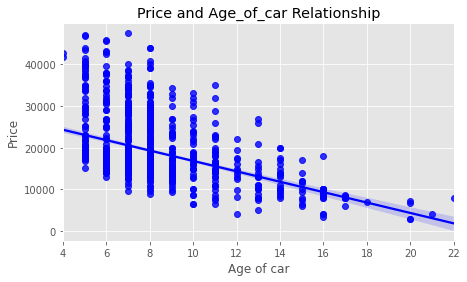

In [54]:
# Price and year relationship
plt.figure(figsize=[7,4])

sns.regplot(x=df['Age of car'][:1000], y=df['Price'][:1000], color = 'blue', marker = 'o').set_title("Price and Age_of_car Relationship")

**Observations**
1. The price of car with low age is comparitively more.
2. The price of car with more age(i.e more than 15) is less.

**Cars divided according to their Mileage('Miles travelled') to a new column Car Usage.**
1. Cars with Mileage less than 25000 are categorized as low.
2. Cars with Mileage in between 25000 and 80000 are categorized as moderate.
3. Cars with Mileage above 80000.

In [56]:
#Function to determine the Car Usage

def Usage(value):
    if value < 25000 :
        result = 'Low'
    elif (value >= 25000 & value <= 80000) :
        result = 'Moderate'
    else:
        result = 'High'
    return result


df['Car Usage'] = df['Mileage'].apply(Usage)

In [57]:
df

,Price,Year,Mileage,City,State,Make,Model,Age of car,Car Usage
0,16472,2015,18681,JEFFERSON CITY,MO,BUICK,ENCORECONVENIENCE,7,Low
1,15749,2015,27592,HIGHLAND,IN,BUICK,ENCOREFWD,7,Moderate
2,16998,2015,13650,BOONE,NC,BUICK,ENCORELEATHER,7,Low
3,15777,2015,25195,NEW ORLEANS,LA,BUICK,ENCOREFWD,7,Moderate
4,16784,2015,22800,LAS VEGAS,NV,BUICK,ENCORECONVENIENCE,7,Low
...,...,...,...,...,...,...,...,...,...
2059279,17909,2013,36275,CHARLOTTE,NC,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate
2062500,18995,2013,43079,MISSION,TX,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate
2062580,16551,2013,68107,AUSTIN,TX,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate
2062970,43950,2017,13569,HAYWARD,CA,VOLKSWAGEN,TOUAREGV6,5,Low


<AxesSubplot:xlabel='Year', ylabel='Price'>

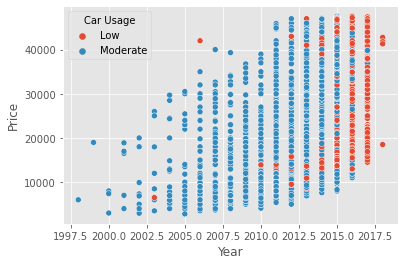

In [58]:
sns.scatterplot(x = df["Year"], y = df["Price"][:10000], hue = df['Car Usage'])

**Observations**
1. The Cars of Year after 2015 have a usage level of low.
2. The number of cars with a moderate usage level are more.  

In [59]:
df['City'].describe()

count     1146355
unique       2445
top       HOUSTON
freq        19331
Name: City, dtype: object

**Cars divided in order of the City importance. The cities with high frequency of cars are considered importance of high.Two list consists of city names l1 and l2. l1 list contains top 20 cities according to the frequency distribution. While l2 consists upto top 50 and considered as importance of moderate. And the rest cities are considered as of low importance**

In [60]:
l1 = ['HOUSTON', 'SAN ANTONIO', 'LOUISVILLE', 'AUSTIN', 'JACKSONVILLE', 'ORLANDO', 'MIAMI', 'COLORADO SPRINGS', 'RALEIGH', 'COLUMBIA', 'PHILADELPHIA', 'DALLAS', 'PHOENIX', 'TUCSON', 'LAS VEGAS', 'TAMPA', 'COLUMBUS', 'MARIETTA', 'CHARLOTTE', 'VICTORVILLE']

In [61]:
l2 = ['CHICAGO', 'PLANO', 'INDIANAPOLIS', 'EL PASO', 'ALBUQUERQUE', 'SPRINGFIELD', 'ARLINGTON', 'PUYALLUP', 'SACRAMENTO', 'FORT WORTH', 'CHANTILLY', 'OKLAHOMA CITY', 'CONCORD', 'MANASSAS', 'LAKEWOOD', 'FREDERICKSBURG', 'SAN DIEGO', 'DULUTH', 'RICHMOND', 'CINCINNATI', 'MADISON', 'CARROLLTON', 'TACOMA', 'UNION CITY', 'VIRGINIA BEACH', 'ENGLEWOOD', 'FAYETTEVILLE', 'WEST PALM BEACH', 'SAN JOSE', 'WILMINGTON', 'PENSACOLA', 'HOLLYWOOD', 'SARASOTA', 'TEMPE', 'AUBURN', 'GAINESVILLE', 'TULSA', 'SCOTTSDALE', 'PORTLAND', 'ESCONDIDO', 'NASHVILLE', 'MESA', 'DORAL', 'OMAHA', 'SANFORD', 'LAFAYETTE', 'LITTLE ROCK', 'PEORIA', 'BALTIMORE', 'CORPUS CHRISTI', 'AURORA', 'MEMPHIS', 'BEDFORD', 'MCKINNEY', 'BURLINGTON', 'CHESAPEAKE', 'HONOLULU', 'EL CAJON', 'KILLEEN', 'DENVER', 'MILWAUKEE', 'KANSAS CITY', 'SCHAUMBURG', 'SAVANNAH', 'BUFORD', 'ALEXANDRIA', 'LEXINGTON', 'LITTLETON', 'FAIRFIELD', 'GREENSBORO', 'GREENVILLE', 'GRAPEVINE', 'ATLANTA', 'MERRIAM', 'HENDERSON', 'BELLEVUE', 'FREMONT', 'LONG ISLAND CITY', 'SEATTLE', 'SALT LAKE CITY']

In [62]:
#Function to determine the City Importance

def importance(value):
    if value in l1 :
        result = 'High'
    elif value in l2 :
        result = 'Moderate'
    else:
        result = 'Low'
    return result


df['City Importance'] = df['City'].apply(importance)

In [63]:
df

,Price,Year,Mileage,City,State,Make,Model,Age of car,Car Usage,City Importance
0,16472,2015,18681,JEFFERSON CITY,MO,BUICK,ENCORECONVENIENCE,7,Low,Low
1,15749,2015,27592,HIGHLAND,IN,BUICK,ENCOREFWD,7,Moderate,Low
2,16998,2015,13650,BOONE,NC,BUICK,ENCORELEATHER,7,Low,Low
3,15777,2015,25195,NEW ORLEANS,LA,BUICK,ENCOREFWD,7,Moderate,Low
4,16784,2015,22800,LAS VEGAS,NV,BUICK,ENCORECONVENIENCE,7,Low,High
...,...,...,...,...,...,...,...,...,...,...
2059279,17909,2013,36275,CHARLOTTE,NC,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate,High
2062500,18995,2013,43079,MISSION,TX,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate,Low
2062580,16551,2013,68107,AUSTIN,TX,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate,High
2062970,43950,2017,13569,HAYWARD,CA,VOLKSWAGEN,TOUAREGV6,5,Low,Low


In [64]:
df['State'].value_counts()

TX    129788
CA    108850
FL    102019
GA     52146
IL     51305
NC     49162
VA     46185
PA     38202
NY     36568
NJ     35932
OH     32061
AZ     31255
WA     30260
CO     29750
MA     25482
TN     25380
MD     24583
MO     22126
IN     21827
KY     18874
AL     17226
WI     15478
MN     14713
CT     14441
MI     14269
OK     13889
UT     13819
OR     13653
SC     13304
LA     10770
KS     10368
NV      9940
AR      9006
NH      7895
MS      7850
NM      6676
NE      6471
IA      6253
ID      4482
DE      3590
HI      3542
ME      2520
RI      2499
MT      2364
AK      2173
WV      1941
ND      1662
VT      1488
SD      1411
WY       881
DC        26
Name: State, dtype: int64

**Cars divided with respect to their State Importance.The states with high frequency of cars are considered importance of high.Two list consists of state names s1 and s2. List s1 contains top 10 states according to the frequency distribution. List s2 contains from 11 upto top 25 states and are of moderate importance. While rest fall in low importance**

In [65]:
s1 = ['TX', 'CA', 'FL', 'GA', 'IL', 'NC', 'VA', 'PA', 'NY', 'NJ']

In [66]:
s2 = ['OH', 'AZ', 'WA', 'CO', 'MA', 'TN', 'MD', 'MO', 'IN', 'KY', 'AL', 'WI', 'MN', 'CT', 'MI', 'OK', 'UT', 'OR', 'SC', 'LA']

In [67]:
#Function to determine the State Importance

def importance(value):
    if value in s1 :
        result = 'High'
    elif value in s2 :
        result = 'Moderate'
    else:
        result = 'Low'
    return result


df['State Importance'] = df['State'].apply(importance)

In [68]:
df

,Price,Year,Mileage,City,State,Make,Model,Age of car,Car Usage,City Importance,State Importance
0,16472,2015,18681,JEFFERSON CITY,MO,BUICK,ENCORECONVENIENCE,7,Low,Low,Moderate
1,15749,2015,27592,HIGHLAND,IN,BUICK,ENCOREFWD,7,Moderate,Low,Moderate
2,16998,2015,13650,BOONE,NC,BUICK,ENCORELEATHER,7,Low,Low,High
3,15777,2015,25195,NEW ORLEANS,LA,BUICK,ENCOREFWD,7,Moderate,Low,Moderate
4,16784,2015,22800,LAS VEGAS,NV,BUICK,ENCORECONVENIENCE,7,Low,High,Low
...,...,...,...,...,...,...,...,...,...,...,...
2059279,17909,2013,36275,CHARLOTTE,NC,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate,High,High
2062500,18995,2013,43079,MISSION,TX,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate,Low,High
2062580,16551,2013,68107,AUSTIN,TX,VOLKSWAGEN,"GTI4-DOOR,",9,Moderate,High,High
2062970,43950,2017,13569,HAYWARD,CA,VOLKSWAGEN,TOUAREGV6,5,Low,Low,High
